<a href="https://colab.research.google.com/github/jessystem/An-lise_Games/blob/main/ANALISE_JOGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a base

In [ ]:
import kagglehub

caminho = kagglehub.dataset_download("anandshaw2001/video-game-sales", path="vgsales.csv")

df = pd.read_csv(caminho)

##Análise dos dados

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

##Análise de duplicados e valores nulos

In [ ]:
print(df.isnull().sum())  #valores ausentes em cada coluna

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
#Categorizando os valores em brancos com 'Desconhecido'
categorical_cols = df.select_dtypes(include=['object']).columns

# MEDIA NOS VALORES NULOS
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df.dropna(inplace=True)

In [ ]:
print("Valores ausentes:")
print(df.isnull().sum().sum())

Valores ausentes:
0


##Gráficos

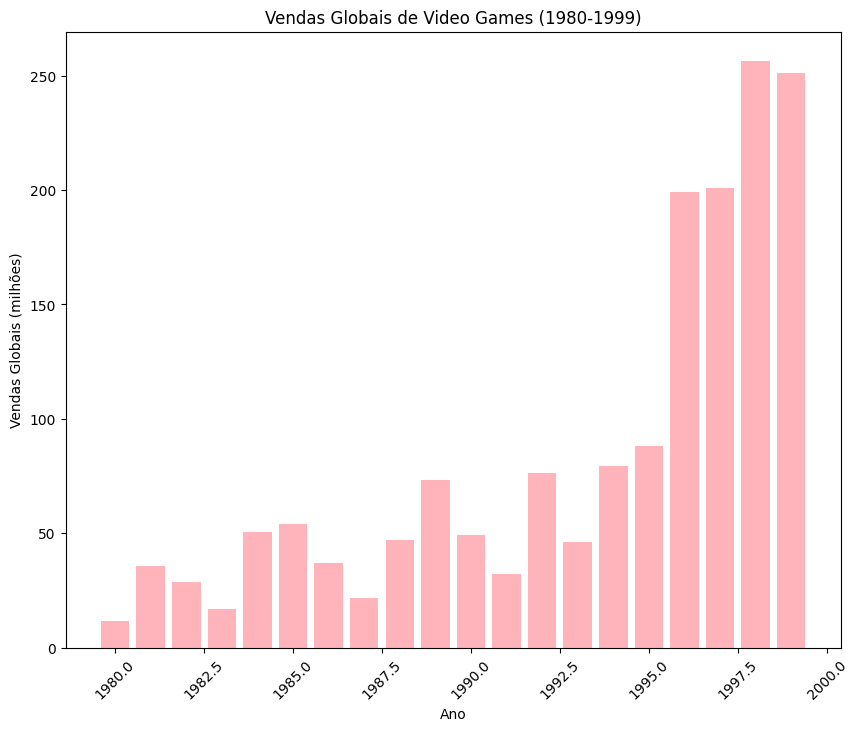

In [ ]:
cor_pastel = "#FFB3BA"  # Tom de rosa pastel

plt.figure(figsize=(10, 8))
plt.bar(df_agrupado["Year"], df_agrupado["Global_Sales"], color=cor_pastel)
plt.xlabel("Ano")
plt.ylabel("Vendas Globais (milhões)")
plt.title("Vendas Globais de Video Games (1980-1999)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-1675a0526875>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.index, y=top_categorias.values, palette="rocket")


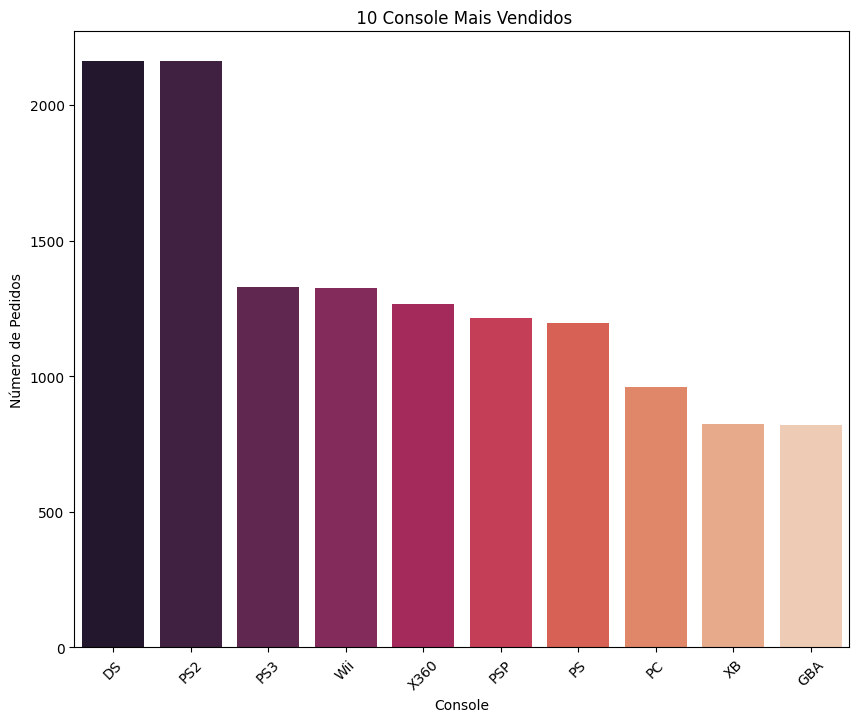

In [ ]:
# Contar os consoles mais vendidos
top_categorias = df['Platform'].value_counts().head(10)

# Criar um gráfico de barras com cores
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values, palette="rocket")
plt.xlabel('Console')
plt.ylabel('Número de Pedidos')
plt.title(' 10 Console Mais Vendidos')
plt.xticks(rotation=45)
plt.show()

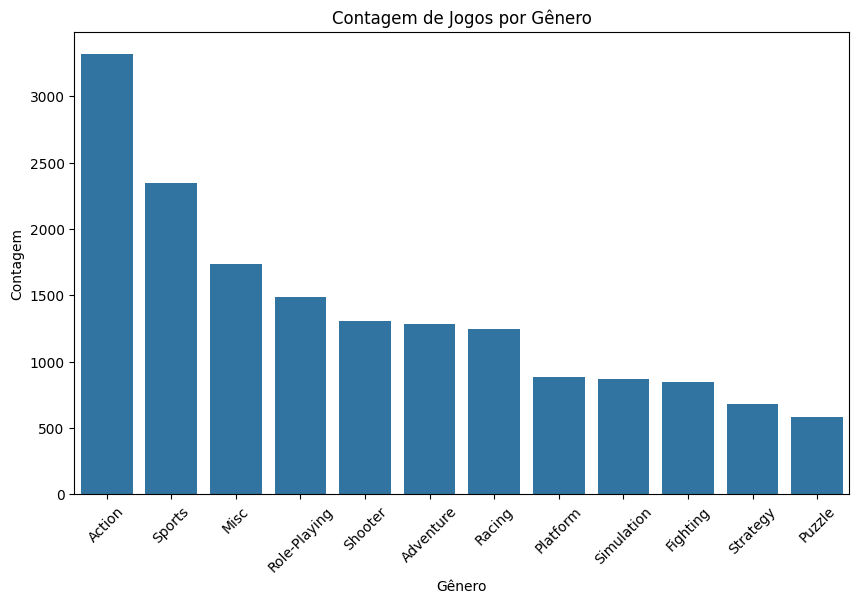

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Contagem de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()